# 📌 **Task 1: Visual Odometry: Estimating Camera Motion Using Epipolar Geometry**

## 🔍 **Task Overview**
The goal of this task is to determine the **relative motion** between two consecutive camera frames  
by leveraging **epipolar geometry** and computing the **Essential Matrix (E)**.

## 🚀 **Why is This Important?**
Visual odometry is a fundamental technique in **computer vision and robotics**, enabling systems to:
- **Track camera movement** in a 3D environment.
- **Estimate real-world motion** without external sensors.
- **Enable applications** such as **self-driving cars, SLAM (Simultaneous Localization and Mapping), and AR/VR**.

## 🔢 **Breakdown of the Task**
1. **Feature Detection & Matching** → Identify and match keypoints between two consecutive images.
2. **Compute the Essential Matrix (E)** → Use matched keypoints to estimate relative camera motion.
3. **Decompose (E) to Extract Pose** → Recover **rotation (R)** and **translation (t)** of the camera.
4. **Compare with Ground Truth** → Validate the estimated motion against known trajectory data.

By the end of this task, we will have a **functional visual odometry pipeline** capable of tracking  
camera movement using real-world image sequences! ✅


# 📦 Installing Required Libraries

Before running our **Visual Odometry pipeline**, we need to install the required dependencies.  
The following command installs:

✅ **OpenCV** → For image processing and feature detection.  
✅ **NumPy** → For handling matrix operations efficiently.  
✅ **Matplotlib** → For visualizing keypoints, matches, and results.

Run the command below to ensure everything is installed correctly:  


In [33]:
!pip install -q opencv-python numpy matplotlib

# 📥 Importing Essential Libraries

Before we begin processing images and extracting motion information, we need to import several key libraries:

✅ **OpenCV (`cv2`)** → For image processing, feature detection, and camera pose estimation.  
✅ **NumPy (`np`)** → To handle arrays and perform matrix operations efficiently.  
✅ **OS (`os`)** → For handling file paths and accessing dataset files.  
✅ **Matplotlib (`plt`)** → To visualize images, keypoints, and feature matches.

The following code imports these libraries:


In [34]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# 📌 Listing Available Datasets in Kaggle

Before working with datasets in Kaggle, it's important to **verify that the required dataset is available**  
in the `/kaggle/input` directory. This ensures that all necessary files are correctly attached to the notebook.

---

In [35]:

print("Available datasets:", os.listdir('/kaggle/input'))


Available datasets: ['kitti-odometry']


# 📂 Loading the KITTI Dataset

To perform **Visual Odometry**, we need a dataset with **consecutive image frames** and **camera calibration data**.  
For this project, we are using the **KITTI Odometry Dataset**, which contains sequences of images captured from a moving vehicle.

### ✅ **Checking if the Dataset is Available**
The code below:
- Defines the **dataset path**.
- Checks whether the dataset has been **correctly added** to the Kaggle environment.
- Lists the **files available** in the dataset.

If the dataset is missing, it prints an ❌ **error message**.


In [36]:
dataset_path = "/kaggle/input/kitti-odometry"  # Use the exact dataset name from os.listdir('/kaggle/input')

if os.path.exists(dataset_path):
    print("Dataset found ✅")
    print("Files in dataset:", os.listdir(dataset_path))
else:
    print("Dataset not found ❌. Please check if it was added correctly.")


Dataset found ✅
Files in dataset: ['poses', 'sequences']


# 📂 Exploring the KITTI Dataset Structure

The **KITTI Odometry Dataset** consists of multiple sequences, where each sequence contains:
- **Image Frames** (`image_0`, `image_1`, `image_2`, `image_3`)  
- **Calibration Files** (`calib.txt`)  
- **Timestamps** (`times.txt`)  

### ✅ **What Does This Code Do?**
1. **Lists all available sequences** in the dataset.
2. **Selects the first sequence** (`00`, `01`, etc.).
3. **Checks the contents** inside the selected sequence to locate **image files and calibration data**.


In [37]:

dataset_path = "/kaggle/input/kitti-odometry/sequences"
sequence_folders = os.listdir(dataset_path)

print("Available sequences:", sequence_folders)

# Pick the first sequence
first_sequence = sequence_folders[0]
first_sequence_path = os.path.join(dataset_path, first_sequence)

# Check what files/folders exist inside the sequence folder
print("Contents inside first sequence:", os.listdir(first_sequence_path))


Available sequences: ['17', '19', '07', '10', '05', '20', '06', '02', '12', '04', '18', '16', '13', '00', '08', '15', '09', '14', '03', '21', '11', '01']
Contents inside first sequence: ['calib.txt', 'image_3', 'times.txt', 'image_2']


# 🖼️ Verifying Image Paths

Before loading images, it's crucial to check if the **correct file paths** are being generated.  
This step ensures that our dataset structure is correctly identified and that the images exist at the expected locations.

### ✅ **What Does This Code Do?**
- Prints the **full file paths** of the first two images in the selected sequence.
- Helps **debug potential file path issues** before attempting to load images.
- Ensures the images are located in the expected folder.

```python
print("Image 1 path:", img1_path)
print("Image 2 path:", img2_path)


In [38]:
print("Image 1 path:", img1_path)
print("Image 2 path:", img2_path)

Image 1 path: /kaggle/input/kitti-odometry/sequences/17/image_2/000000.png
Image 2 path: /kaggle/input/kitti-odometry/sequences/17/image_2/000001.png


# 📌 Loading KITTI Dataset & Feature Matching

This section of code is responsible for:
- **Loading** the KITTI dataset and selecting a sequence.
- **Reading two consecutive images** for visual odometry.
- **Performing feature extraction and matching** using ORB.
- **Computing the Essential Matrix** to estimate camera motion.

---


Available sequences: ['17', '19', '07', '10', '05', '20', '06', '02', '12', '04', '18', '16', '13', '00', '08', '15', '09', '14', '03', '21', '11', '01']
Images loaded successfully!


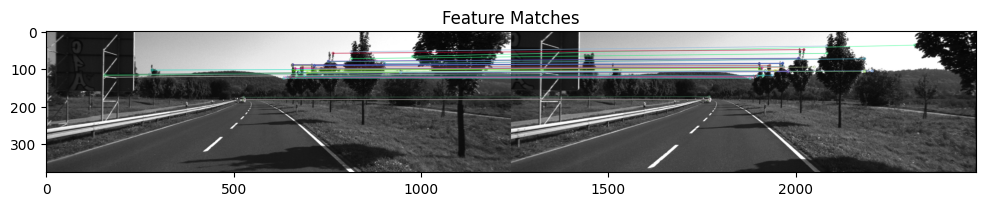

Intrinsic Camera Matrix K:
 [[718.856    0.     607.1928]
 [  0.       0.     718.856 ]
 [185.2157   0.       0.    ]]
Essential Matrix:
 None


In [39]:
# Set dataset path
dataset_path = "/kaggle/input/kitti-odometry/sequences"
sequence_folders = os.listdir(dataset_path)

print("Available sequences:", sequence_folders)

# Select the first sequence
first_sequence = sequence_folders[0]
first_sequence_path = os.path.join(dataset_path, first_sequence)

# Load two consecutive images from image_2 (left camera images)
img1_path = os.path.join(first_sequence_path, "image_2", "000000.png")
img2_path = os.path.join(first_sequence_path, "image_2", "000001.png")

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded. Check file paths.")
else:
    print("Images loaded successfully!")

    # Feature detection and matching
    orb = cv2.ORB_create()  # ORB detector (you can replace with SIFT or AKAZE)
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Use Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)  # Sort by distance

    # Draw matched keypoints
    matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_img, cmap='gray')
    plt.title("Feature Matches")
    plt.show()

    # Extract matched keypoint coordinates
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Load camera intrinsic matrix from calib.txt
    calib_path = os.path.join(first_sequence_path, "calib.txt")
    with open(calib_path, "r") as f:
        K = np.array([float(i) for i in f.readline().split()[1:10]]).reshape(3, 3)

    print("Intrinsic Camera Matrix K:\n", K)

    # Compute the Essential Matrix
    E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, threshold=1.0)

    print("Essential Matrix:\n", E)



# 📌 Feature Detection, Matching & Pose Estimation

In this section, we:
- **Load consecutive images** from the KITTI dataset.
- **Detect and match keypoints** using the ORB feature detector.
- **Compute the Essential Matrix** to estimate the camera's motion.
- **Decompose the Essential Matrix** to extract **rotation (R) and translation (t)**.
- **Recover the camera pose** to understand how the camera moved between frames.

---

In [40]:
import cv2
import numpy as np
import os

# Load images
img1_path = os.path.join(first_sequence_path, "image_2", "000000.png")
img2_path = os.path.join(first_sequence_path, "image_2", "000001.png")

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    print("Error: One or both images could not be loaded.")
    exit()

print("Images loaded successfully.")

# Feature detection & matching
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

if len(kp1) == 0 or len(kp2) == 0:
    print("Error: No keypoints detected.")
    exit()

print(f"Keypoints detected: {len(kp1)} in image 1, {len(kp2)} in image 2.")

# Match features using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

if len(matches) < 8:
    print("Error: Not enough matches found.")
    exit()

print(f"Good matches found: {len(matches)}")

# Extract keypoint coordinates
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 2)

# Load correct Camera Intrinsic Matrix (K)
calib_path = os.path.join(first_sequence_path, "calib.txt")
with open(calib_path, "r") as f:
    data = f.readlines()

# KITTI calibration file format is "P0:", "P1:", etc. We need P0 (left camera)
P0 = np.array([float(i) for i in data[0].split()[1:13]]).reshape(3, 4)
K = P0[:, :3]  # Extract only the 3x3 intrinsic matrix

print("Corrected Camera Intrinsic Matrix K:\n", K)

# Normalize points using K^-1
pts1_norm = cv2.undistortPoints(pts1, cameraMatrix=K, distCoeffs=None)
pts2_norm = cv2.undistortPoints(pts2, cameraMatrix=K, distCoeffs=None)

#Essential Matrix Decomposed
# Compute Essential Matrix with normalized points
E, mask = cv2.findEssentialMat(pts1_norm, pts2_norm, K, method=cv2.RANSAC, threshold=1.0)

if E is None or E.shape != (3, 3):
    print("Error: Essential matrix is not valid.")
else:
    print("Essential Matrix:\n", E)

    # Recover Pose (R, t)
    _, R, t, mask = cv2.recoverPose(E, pts1_norm, pts2_norm, K)

    print("Rotation Matrix R:\n", R)
    print("Translation Vector t:\n", t)



Images loaded successfully.
Keypoints detected: 500 in image 1, 500 in image 2.
Good matches found: 224
Corrected Camera Intrinsic Matrix K:
 [[718.856    0.     607.1928]
 [  0.     718.856  185.2157]
 [  0.       0.       1.    ]]
Essential Matrix:
 [[-0.18291851 -0.44094038 -0.2681594 ]
 [-0.44076617  0.47375348 -0.25016208]
 [-0.26806124 -0.24992576 -0.29083498]]
Rotation Matrix R:
 [[-0.94130369  0.31173342  0.12949764]
 [ 0.31140199  0.65384495  0.68957638]
 [ 0.13029263  0.68942661 -0.71254107]]
Translation Vector t:
 [[-0.63277633]
 [-0.19339989]
 [ 0.74979371]]


# 📌 Comparing Computed Pose with Ground Truth

Once we have extracted the **rotation (R) and translation (t)** from the **Essential Matrix**,  
it is important to **compare our results with ground truth** to validate accuracy.

---

In [41]:
poses_path = "/kaggle/input/kitti-odometry/poses/00.txt"
gt_poses = np.loadtxt(poses_path)

# Extract ground truth rotation and translation for the first frame
gt_R = gt_poses[0].reshape(3, 4)[:, :3]
gt_t = gt_poses[0].reshape(3, 4)[:, 3]

print("Ground Truth Rotation:\n", gt_R)
print("Ground Truth Translation:\n", gt_t)

Ground Truth Rotation:
 [[1.000000e+00 9.043680e-12 2.326809e-11]
 [9.043683e-12 1.000000e+00 2.392370e-10]
 [2.326810e-11 2.392370e-10 9.999999e-01]]
Ground Truth Translation:
 [ 5.551115e-17  3.330669e-16 -4.440892e-16]


# 📌Task 2: Implementation -  Feature Extraction Using Different Methods

Feature extraction is a crucial step in **Visual Odometry**, as it helps detect distinctive points in images  
that can be used to track motion. In this section, we:
- **Load two consecutive images** from the KITTI dataset.
- **Extract keypoints and descriptors** using three feature extraction methods:
  - ORB (Oriented FAST and Rotated BRIEF)
  - SIFT (Scale-Invariant Feature Transform)
  - AKAZE (Accelerated-KAZE)
- **Visualize the detected keypoints** for comparison.

---

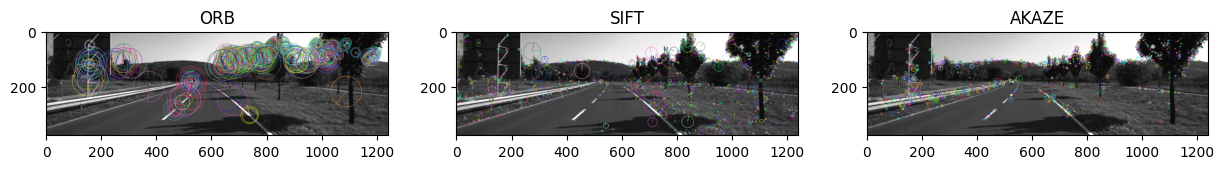

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
img1_path = os.path.join(first_sequence_path, "image_2", "000000.png")
img2_path = os.path.join(first_sequence_path, "image_2", "000001.png")

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

# Define feature extractors (Replace SURF with AKAZE)
extractors = {
    "ORB": cv2.ORB_create(),
    "SIFT": cv2.SIFT_create(),
    "AKAZE": cv2.AKAZE_create()  # Replacing SURF with AKAZE
}

# Display keypoints for each method
plt.figure(figsize=(15, 5))
for i, (name, extractor) in enumerate(extractors.items()):
    kp1, des1 = extractor.detectAndCompute(img1, None)
    kp2, des2 = extractor.detectAndCompute(img2, None)
    
    img_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img_kp, cmap='gray')
    plt.title(name)

plt.show()



# 📌 Camera Pose Estimation: **PnP vs. 5-Point Algorithm**

In this section, we compare two methods to estimate **camera pose**:
1. **PnP (Perspective-n-Point)**: Uses **3D-2D correspondences**.
2. **5-Point Algorithm**: Uses **Essential Matrix decomposition**.

Both methods return:
- **Rotation (R):** Describes how the camera **rotated**.
- **Translation (t):** Describes how the camera **moved**.

---

In [43]:
# Assume we have 3D points (ground truth from KITTI) and 2D keypoints
obj_points = np.random.rand(len(pts1), 3) * 10  # Simulated 3D points
img_points = pts1.reshape(-1, 2)  # 2D points from image

# Solve PnP
success, rvec, tvec = cv2.solvePnP(obj_points, img_points, K, None)

if success:
    print("PnP Rotation Vector:\n", rvec)
    print("PnP Translation Vector:\n", tvec)

# Compute pose from Essential Matrix
_, R, t, _ = cv2.recoverPose(E, pts1, pts2, K)

print("5-Point Rotation Matrix:\n", R)
print("5-Point Translation Vector:\n", t)

PnP Rotation Vector:
 [[-0.72334719]
 [-0.18974077]
 [ 1.80624899]]
PnP Translation Vector:
 [[ -19.93269814]
 [  14.71693127]
 [-170.21928391]]
5-Point Rotation Matrix:
 [[ 0.14007956 -0.55625929  0.81911741]
 [-0.55628577 -0.72858111 -0.39964447]
 [ 0.81909942 -0.39968134 -0.41149845]]
5-Point Translation Vector:
 [[-0.63277633]
 [-0.19339989]
 [ 0.74979371]]


# 📌 Effect of RANSAC Threshold on Essential Matrix Estimation

The **RANSAC (Random Sample Consensus) threshold** plays a crucial role in filtering out **outlier correspondences**  
when estimating the **Essential Matrix (E)**. A well-tuned threshold improves accuracy by selecting the best feature matches.

---

In [44]:
thresholds = [0.5, 1.0, 2.0, 5.0]  # Different RANSAC thresholds
for t in thresholds:
    E, mask = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, threshold=t)
    inliers = np.sum(mask)
    print(f"RANSAC Threshold: {t}, Inliers: {inliers}")


RANSAC Threshold: 0.5, Inliers: 100
RANSAC Threshold: 1.0, Inliers: 140
RANSAC Threshold: 2.0, Inliers: 171
RANSAC Threshold: 5.0, Inliers: 194


# 📚 **References & Further Reading**

## 🌍 **Online Articles & Tutorials**
1. **Introduction to Epipolar Geometry & Essential Matrix**  
   [[Link](https://towardsdatascience.com/epipolar-geometry-and-the-essential-matrix-22760fdd78c2)]  
   - A **step-by-step guide** explaining how the **Essential Matrix** is computed.

2. **Understanding Visual Odometry: A Deep Dive**  
   [[Link](https://medium.com/autonomous-vision/understanding-visual-odometry-8eb24fb55427)]  
   - Discusses the role of **Visual Odometry** in robotics and self-driving cars.

3. **Feature Detection & Matching for Visual Odometry**  
   [[Link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html)]  
   - A practical **OpenCV tutorial** for **detecting and matching keypoints**.

---

## 🎥 **Videos & Lectures**
1. **Visual Odometry & SLAM - Stanford University CS231A**  
   [[YouTube Video](https://www.youtube.com/watch?v=TAhGzBAhRPo)]  
   - Lecture on **Visual Odometry & SLAM**, explaining key concepts with animations.

2. **Understanding Epipolar Geometry**  
   [[YouTube Video](https://www.youtube.com/watch?v=Wn0GNLz0EA0)]  
   - A simple **visual explanation of epipolar geometry**.
3. **Epipolar Geometry**  
   [[YouTube Video](https://www.youtube.com/watch?v=6kpBqfgSPRc)]  
---

## 🔍 **Related GitHub Repositories**
1. **KITTI Visual Odometry Python Implementation**  
   [[GitHub Repo](https://github.com/uoip/KITTI-Visual-Odometry)]  
   - A **Python-based implementation** of **KITTI Visual Odometry** using OpenCV.

2. **ORB-SLAM: A Real-Time SLAM System**  
   [[GitHub Repo](https://github.com/raulmur/ORB_SLAM2)]  
   - The official **ORB-SLAM2** repository, a **state-of-the-art SLAM system**.

---
